In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sqlalchemy import create_engine
from config import pwd_postgresql 
import tensorflow as tf
import sklearn
from sklearn import model_selection
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

In [2]:
import psycopg2

In [3]:
#Trying to create connection
protocol = 'postgresql'
username = 'postgres'  
password = "mariam2307"
host = 'localhost'
port = 5432                       # Potentially yours is 5432
database_name = 'heartDB'
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
rds_connection_string
engine = create_engine(rds_connection_string)

In [4]:
# Checking for tables??
engine.table_names()

C:\Users\44742\AppData\Local\Temp\ipykernel_10192\144398348.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['heart_data']

In [5]:
#  Import and read data
heart_df = pd.read_sql_query('select * from heart_data', con=engine)
heart_df.head()

,age,sex,Chest Pain Type,bp,cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluoro,thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# Attempting online example of Binary Classification

In [6]:
#Following online example 
heart_df['Heart Disease'].head()

0    Presence
1     Absence
2    Presence
3     Absence
4     Absence
Name: Heart Disease, dtype: object

In [7]:
heart_df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [8]:
le = LabelEncoder()
heart_df["Heart Disease"] = le.fit_transform(heart_df["Heart Disease"])

In [9]:
X = heart_df.drop("Heart Disease", axis=1)
# Assuming the label is in a column named "label"
y = heart_df["Heart Disease"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [11]:
#normalise data
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)
heart_df

,age,sex,Chest Pain Type,bp,cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluoro,thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [12]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [13]:
#calling a model
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.80      0.82      0.81        40
           1       0.74      0.71      0.73        28

    accuracy                           0.78        68
   macro avg       0.77      0.77      0.77        68
weighted avg       0.78      0.78      0.78        68



In [14]:
auc = roc_auc_score(y_test, predictions)

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)

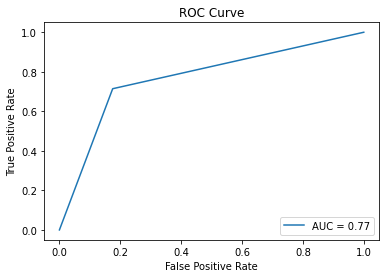

In [16]:
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
